<a href="https://colab.research.google.com/github/Sourodip-Kundu/NLP_Disaster_Tweet/blob/main/NLPDisasterTweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import string
import re

In [ ]:
#importing nlp and related libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk import wordnet

In [ ]:
#importing machine learning, deep learning & related libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm  import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from tensorflow.python.keras import models, layers, optimizers
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras import Sequential
from imblearn.over_sampling import SMOTE

In [ ]:
#loading the dataset
train_data = pd.read_csv('drive/My Drive/NLP_With_Disaster_Tweets/nlp-getting-started/train.csv')
test_data  = pd.read_csv('drive/My Drive/NLP_With_Disaster_Tweets/nlp-getting-started/test.csv')

In [ ]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_data.shape

(7613, 5)

In [ ]:
test_data.shape

(3263, 4)

In [ ]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
id          3263 non-null int64
keyword     3237 non-null object
location    2158 non-null object
text        3263 non-null object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


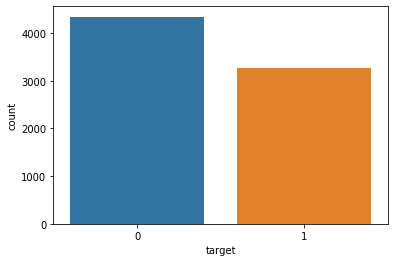

In [ ]:
sns.countplot(x = 'target', data = train_data)

# Cleaning the tweets

In [ ]:
#Function for removing URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [ ]:
#Function for removing HTML codes
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [ ]:
def remove_emoji(text):
    try:
        # Wide UCS-4 build
        emoji_pattern = re.compile(u'['
                          u'\U0001F300-\U0001F64F'
                          u'\U0001F680-\U0001F6FF'
                          u'\u2600-\u2B55'
                          u'\u23cf'
                          u'\u23e9'
                          u'\u231a'
                          u'\u3030'
                          u'\ufe0f'
                          u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u'\U00010000-\U0010ffff'
                           u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
                           u'\U00002702-\U000027B0]+',     
                          re.UNICODE)
    except emoji_pattern.error:
        # Narrow UCS-2 build
        myre =   re.compile(u'('
                                  u'\ud83c[\udf00-\udfff]|'
                                  u'\ud83d[\udc00-\ude4f]|'
                                  u'\uD83D[\uDE80-\uDEFF]|'
                                  u"(\ud83d[\ude00-\ude4f])|"  # emoticon
                                  u'[\u2600-\u2B55]|'
                                  u'[\u23cf]|'
                                  u'[\u1f918]|'
                                    u'[\u23e9]|'
                                  u'[\u231a]|'
                                  u'[\u3030]|'
                                  u'[\ufe0f]|'
                                  u'\uD83D[\uDE00-\uDE4F]|'
                                  u'\uD83C[\uDDE0-\uDDFF]|'
                                u'[\u2702-\u27B0]|'
                                  u'\uD83D[\uDC00-\uDDFF])+',
                                  re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
#Cleaning train_data
train_data['text'] = train_data['text'].apply(lambda x: remove_URL(x))
train_data['text'] = train_data['text'].apply(lambda x: remove_html(x))
train_data['text'] = train_data['text'].apply(lambda x: remove_emoji(x))

In [ ]:
#Cleaning test_data
test_data['text'] = test_data['text'].apply(lambda x: remove_URL(x))
test_data['text'] = test_data['text'].apply(lambda x: remove_html(x))
test_data['text'] = test_data['text'].apply(lambda x: remove_emoji(x))

In [ ]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
#Cleaning charectars from tweet
def clean_tweet(text):
    return re.sub(r'[^\w]', ' ',text)

In [ ]:
#Cleaning more than one whiteSpace from tweet
def remove_whitespace(text):
  regex =re.compile(r"\s+")
  return regex.sub(" ", text).strip()

In [ ]:
train_data['text'] = train_data['text'].apply(lambda x: clean_tweet(x))
train_data['text'] = train_data['text'].apply(lambda x: remove_whitespace(x))

In [ ]:
tweets_train =train_data['text'].values
tweets_train

array(['Our Deeds are the Reason of this earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask Canada',
       'All residents asked to shelter in place are being notified by officers No other evacuation or shelter in place orders are expected',
       ..., 'M1 94 01 04 UTC 5km S of Volcano Hawaii',
       'Police investigating after an e bike collided with a car in Little Portugal E bike rider suffered serious non life threatening injuries',
       'The Latest More Homes Razed by Northern California Wildfire ABC News'],
      dtype=object)

In [ ]:
tweets_train.shape

(7613,)

In [ ]:
ech_train_tweet= []
for line in tweets_train:
    ech_train_tweet.append([wrds for wrds in re.split(' |,|!|\?', str(line))])

In [ ]:
test_data['text'] = test_data['text'].apply(lambda x: clean_tweet(x))
test_data['text'] = test_data['text'].apply(lambda x: remove_whitespace(x))

In [ ]:
tweets_test =test_data['text'].values
tweets_test

array(['Just happened a terrible car crash',
       'Heard about earthquake is different cities stay safe everyone',
       'there is a forest fire at spot pond geese are fleeing across the street I cannot save them all',
       ..., 'Green Line derailment in Chicago',
       'MEG issues Hazardous Weather Outlook HWO',
       'CityofCalgary has activated its Municipal Emergency Plan yycstorm'],
      dtype=object)

In [ ]:
tweets_test.shape

(3263,)

In [ ]:
ech_test_tweet= []
for line in tweets_test:
    ech_test_tweet.append([wrds for wrds in re.split(' |,|!|\?', str(line))])

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import wordnet
def get_pos_tag(word):
    tag = pos_tag([word])[0][1]
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
nltk.download('stopwords')
punctuations = list(string.punctuation)
stop = stopwords.words('english')
stop += punctuations

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def processed_tweets(words):
    output_words = list()
    for w in words:
        if w.lower() not in stop and len(w) > 0:            
            clean_word = lemmatizer.lemmatize(w, pos = get_pos_tag(w))
            output_words.append(clean_word.lower())
    return output_words

In [ ]:
text_tweet_train = [(processed_tweets(text)) for text in ech_train_tweet]

In [ ]:
text_tweet_test = [(processed_tweets(text)) for text in ech_test_tweet]

In [ ]:
processed_text_tweet_train = [" ".join(text) for text  in text_tweet_train]
processed_text_tweet_test  = [" ".join(text) for text  in text_tweet_test]

In [ ]:
print(processed_text_tweet_train[:5])
print(processed_text_tweet_test[:5])

['deeds reason earthquake may allah forgive u', 'forest fire near la ronge sask canada', 'resident ask shelter place notify officer evacuation shelter place order expect', '13 000 people receive wildfire evacuation order california', 'get sent photo ruby alaska smoke wildfire pours school']
['happen terrible car crash', 'heard earthquake different city stay safe everyone', 'forest fire spot pond geese flee across street cannot save', 'apocalypse light spokane wildfire', 'typhoon soudelor kill 28 china taiwan']


In [ ]:
target = [target for target  in train_data['target']]

In [ ]:
len(target)

7613

# Applying Deep Learning

In [ ]:
# max([len(item.split()) for item in processed_text_tweet_train])

In [ ]:
# #declaring paremeters
# vocab_size=10000
# embedding_dim=16
# max_length=min( max([len(item.split()) for item in processed_text_tweet_train]), 1000)
# trunc_type='post'
# pad_type='post'
# oov_tok='<OOV>'

# #tokenizing train_Sentences
# tokenizer=Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# tokenizer.fit_on_texts(processed_text_tweet_train)
# word2idx=tokenizer.word_index
# sequences=tokenizer.texts_to_sequences(processed_text_tweet_train)
# padded=pad_sequences(sequences,maxlen=max_length,padding=pad_type,truncating=trunc_type)

# #tokinization of test_Sentences
# test_sequences = tokenizer.texts_to_sequences(processed_text_tweet_test)
# test_padded=pad_sequences(test_sequences,maxlen=max_length,padding=pad_type,truncating=trunc_type)

In [ ]:
# target = np.array(train_data['target'].values)

In [ ]:
# #creating the model
# model = Sequential()

In [ ]:
# model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
# model.add(Flatten())
# #input layer
# model.add(Dense(10, activation='relu'))
# #output layer
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

In [ ]:
# num_epochs = 20
# model.fit(padded, target, epochs=num_epochs)

In [ ]:
# score=model.predict(padded)
# pred=(score>0.5).astype('int').reshape(target.shape)
# print(pred, target)
# print(sum(pred==target)/len(target))

In [ ]:
# score = model.predict(test_padded)
# score

In [ ]:
# submission = pd.read_csv('drive/My Drive/NLP_With_Disaster_Tweets/nlp-getting-started/sample_submission.csv')
# submission['target'] = (score>0.7).astype('int')
# submission.to_csv('submission.csv', index=False)

# Applying Machine Learning


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(processed_text_tweet_train, target, test_size=0.3, random_state=0) # Sequence for splitting

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

5329
2284
5329
2284


In [ ]:
count_vec = CountVectorizer(analyzer = 'word', max_features = 5000, ngram_range=(1,3))
X_train_features = count_vec.fit_transform(X_train, y_train)
#creating matrix form
X_train_features = X_train_features.todense()
X_test_features  = count_vec.transform(X_test)
X_test_features  = X_test_features.todense()

In [ ]:
t_vec = TfidfVectorizer(analyzer='word', max_features=5000, ngram_range=(1, 3))

In [ ]:
X_train_features = t_vec.fit_transform(X_train, y_train)
X_train_features = X_train_features.todense()
X_test_features  = t_vec.transform(X_test)
X_test_features  = X_test_features.todense()

In [ ]:
X_train_features

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# pca = PCA(n_components = 50)

In [ ]:
# X_train_features = pca.fit_transform(X_train_features)
# X_test_features  = pca.transform(X_test_features)

In [ ]:
X_train_features

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
min_max_scaler=preprocessing.MinMaxScaler()
min_max_scaler_train =min_max_scaler.fit_transform(X_train_features)

In [ ]:
min_max_scaler2 =preprocessing.MinMaxScaler()
min_max_scaler_test =min_max_scaler2.fit_transform(X_test_features)

In [ ]:
# smote = SMOTE(random_state=50)

In [ ]:
# X_res, y_res = smote.fit_sample(min_max_scaler_train, y_train)

In [ ]:
svc = SVC(C=100, degree = 2, kernel = 'linear')
svc.fit(min_max_scaler_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc.score(min_max_scaler_train, y_train)

0.9819853631075248

In [ ]:
pred = svc.predict(min_max_scaler_test)

In [ ]:
svc.score(min_max_scaler_test, pred)

1.0

In [ ]:
pd.Series(pred).value_counts()

0    1250
1    1034
dtype: int64

In [ ]:
pd.Series(y_test).value_counts()

0    1338
1     946
dtype: int64

In [ ]:
confusion_matrix(y_test , pred)

array([[983, 355],
       [293, 653]])

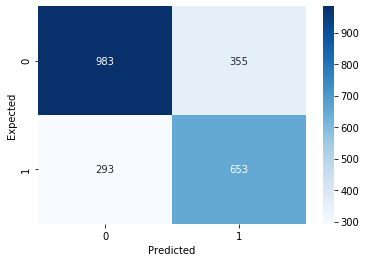

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test , pred)), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
#Creating Models
rfc = RandomForestClassifier(n_estimators=200, random_state=13)
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=13)
ada = AdaBoostClassifier(base_estimator=rfc, n_estimators=2, learning_rate=0.1, random_state=13)

In [ ]:
vcf = VotingClassifier(estimators=[('rfc', rfc), ('gbc', gbc), ('ada', ada)], voting='soft')
vcf.fit(min_max_scaler_train, y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
       

In [ ]:
preds = vcf.predict(min_max_scaler_test)

In [ ]:
vcf.score(min_max_scaler_test, preds)

1.0

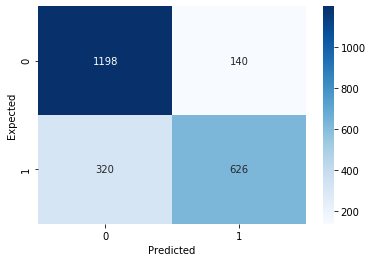

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test , preds)), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
# count_vec = CountVectorizer(analyzer = 'word', max_features = 5000, ngram_range=(1,3))
# X_train_features = count_vec.fit_transform(processed_text_tweet_train, target)
# #creating matrix form
# X_train_features = X_train_features.todense()
# X_test_features = count_vec.transform(processed_text_tweet_test)
# X_test_features = X_test_features.todense()

In [ ]:
# X_train_features = pca.fit_transform(X_train_features)
# X_test_features  = pca.transform(X_test_features)

In [ ]:
# min_max_scaler=preprocessing.MinMaxScaler()
# min_max_scaler_train =min_max_scaler.fit_transform(X_train_features)

In [ ]:
# min_max_scaler2 =preprocessing.MinMaxScaler()
# min_max_scaler_test =min_max_scaler2.fit_transform(X_test_features)

In [ ]:
# svc = SVC(C=100, degree = 2, kernel = 'linear')
# svc.fit(min_max_scaler_train, target)

In [ ]:
# svc.score(min_max_scaler_train, target)

In [ ]:
# preds = svc.predict(min_max_scaler_test)

In [ ]:
# svc.score(min_max_scaler_test, preds)

In [ ]:
# vcf = VotingClassifier(estimators=[('rfc', rfc), ('gbc', gbc), ('ada', ada)], voting='soft')
# vcf.fit(min_max_scaler_train, target)

In [ ]:
# preds = vcf.predict(min_max_scaler_test)

In [ ]:
# vcf.score(min_max_scaler_test, preds)

In [ ]:
#  Submission = pd.DataFrame(test_data.id)

In [ ]:
#  Submission['target'] = preds

In [ ]:
#  Submission.to_csv('Submission.csv', index=False)

In [ ]:
# MAX_FEATURES = 12000
# tokenizer = Tokenizer(num_words=MAX_FEATURES)
# tokenizer.fit_on_texts(X_train)
# train_texts = tokenizer.texts_to_sequences(X_train)
# val_texts = tokenizer.texts_to_sequences(X_test)
# test_texts = tokenizer.texts_to_sequences(processed_text_tweet_test)

In [ ]:
# MAX_LENGTH = max(len(train_ex) for train_ex in train_texts)
# train_texts = pad_sequences(train_texts, maxlen=MAX_LENGTH)
# val_texts = pad_sequences(val_texts, maxlen=MAX_LENGTH)
# test_texts = pad_sequences(test_texts, maxlen=MAX_LENGTH)

In [ ]:
# def build_rnn_model():
#     sequences = layers.Input(shape=(MAX_LENGTH,))
#     embedded = layers.Embedding(MAX_FEATURES, 64)(sequences)
#     x = layers.CuDNNGRU(128, return_sequences=True)(embedded)
#     x = layers.CuDNNGRU(128)(x)
#     x = layers.Dense(32, activation='relu')(x)
#     x = layers.Dense(100, activation='relu')(x)
#     predictions = layers.Dense(1, activation='sigmoid')(x)
#     model = models.Model(inputs=sequences, outputs=predictions)
#     model.compile(
#         optimizer='rmsprop',
#         loss='binary_crossentropy',
#         metrics=['binary_accuracy']
#     )
#     return model
    

In [ ]:
# rnn_model = build_rnn_model()

In [ ]:
# rnn_model.fit(
#     train_texts, 
#     y_train, 
#     batch_size=128,
#     epochs=50,
#     validation_data=(val_texts, y_test), )